In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Dataset/final_dataset.csv')
del df['Unnamed: 0']

## Get Summary Statistics

In [9]:
print(df.describe())

            ratings  no_of_ratings  discount_price  actual_price  \
count  18390.000000   18390.000000    1.839000e+04  1.839000e+04   
mean       3.947227    2135.483904    6.537443e+03  9.935642e+03   
std        0.649333   17377.744145    1.864749e+04  2.567719e+04   
min        1.000000       1.000000    1.000000e+01  3.800000e+01   
25%        3.700000       8.000000    7.390000e+02  1.799000e+03   
50%        4.000000      54.000000    1.859000e+03  3.495000e+03   
75%        4.300000     384.000000    4.082750e+03  6.900000e+03   
max        5.000000  437652.000000    1.249990e+06  1.594900e+06   

       discount_value  discounting_percent     marketcap   price (USD)  \
count    18390.000000         18390.000000  1.839000e+04  18390.000000   
mean      3398.198813             0.429599  2.881634e+11     72.581710   
std       8071.438677             0.198819  5.274921e+11     56.050643   
min          0.050000             0.000017  1.136061e+07      0.010000   
25%        749.00

## Correlation between numerical variables

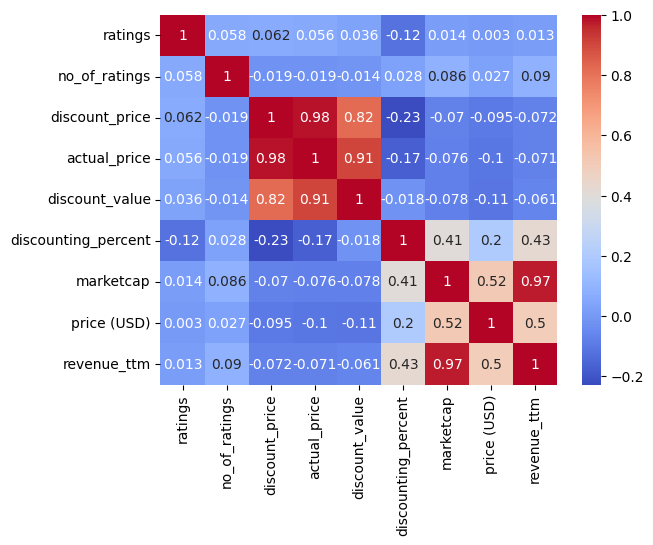

In [19]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## Check for outliers in numerical columns like 'price (USD)', 'discount_price', 'actual_price'

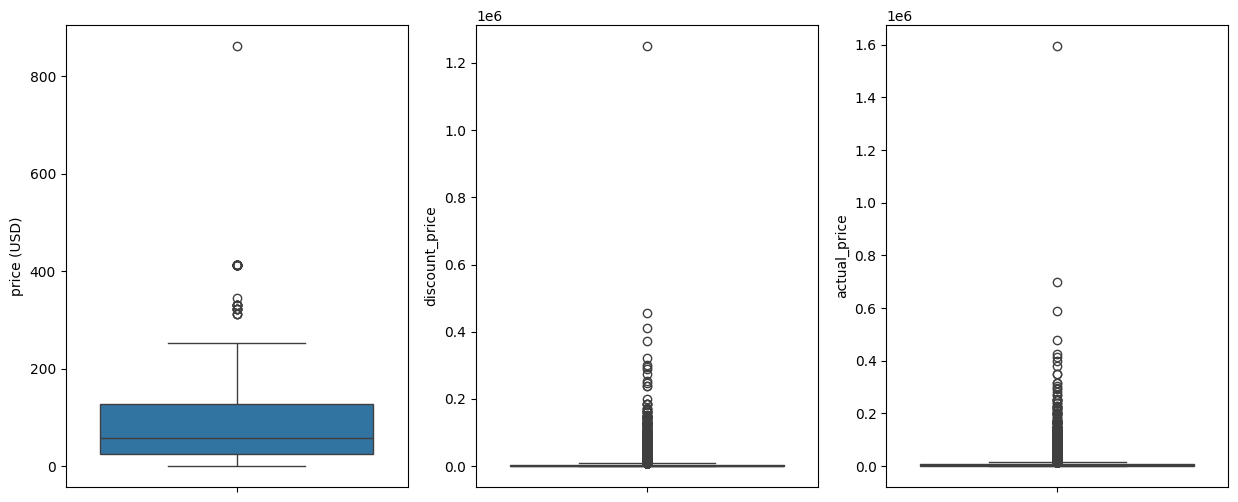

In [31]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(y = 'price (USD)', data = df)
plt.subplot(1,3,2)
sns.boxplot(y = 'discount_price', data = df)
plt.subplot(1,3,3)
sns.boxplot(y = 'actual_price', data = df)
plt.show()

## Count unique products in each category

In [10]:
print(df['main_category'].value_counts())

main_category
men's shoes                4350
tv, audio & cameras        3079
stores                     2211
men's clothing             2124
appliances                 2022
women's clothing           1184
accessories                1105
home & kitchen              576
sports & fitness            531
kids' fashion               327
women's shoes               261
beauty & health             187
car & motorbike             107
toys & baby products         83
bags & luggage               74
grocery & gourmet foods      74
industrial supplies          68
music                        21
pet supplies                  6
Name: count, dtype: int64
sub_category
Casual Shoes             2171
Sports Shoes             1926
Men's Fashion            1191
All Electronics          1109
T-shirts & Polos         1017
                         ... 
Dog supplies                2
Rucksacks                   1
Fashion Sales & Deals       1
Travel Duffles              1
Kids' Watches               1
Name: cou

In [11]:
print(df['sub_category'].value_counts())

sub_category
Casual Shoes             2171
Sports Shoes             1926
Men's Fashion            1191
All Electronics          1109
T-shirts & Polos         1017
                         ... 
Dog supplies                2
Rucksacks                   1
Fashion Sales & Deals       1
Travel Duffles              1
Kids' Watches               1
Name: count, Length: 105, dtype: int64


## Visualize the distribution of ratings

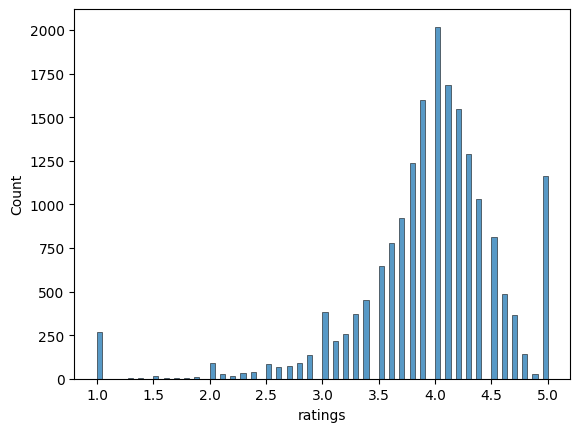

In [15]:
sns.histplot(data=df, x='ratings')
plt.show()

## Visualize the top 10 brands with most products

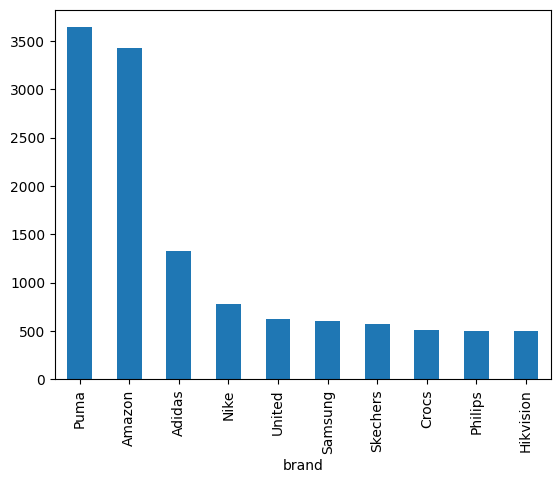

In [17]:
df['brand'].value_counts().head(10).plot(kind='bar')
plt.show()

## Check the average 'ratings' for the top 10 brands with the most products

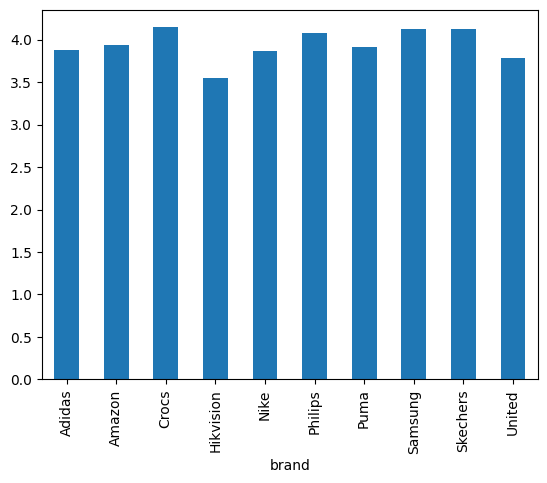

In [28]:
top_brands = df['brand'].value_counts().index[:10]
df[df['brand'].isin(top_brands)].groupby('brand')['ratings'].mean().plot(kind='bar')
plt.show()

## Compare average discount percentages by main categories

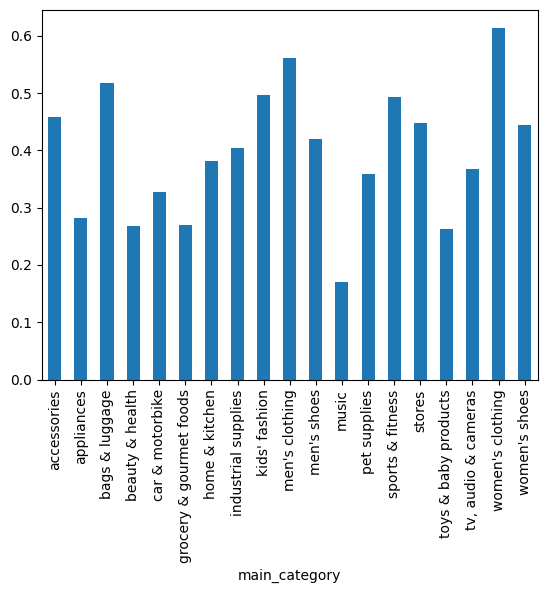

In [18]:
df.groupby('main_category')['discounting_percent'].mean().plot(kind='bar')
plt.show()

## Analyze average ratings per country

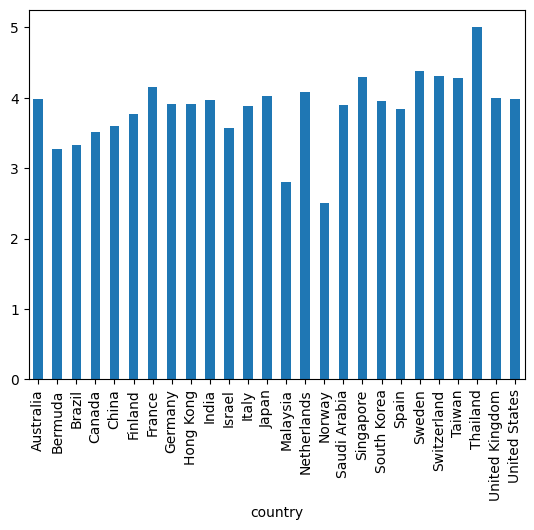

In [20]:
df.groupby('country')['ratings'].mean().plot(kind='bar')
plt.show()

## Analyze the relationship between market cap and revenue

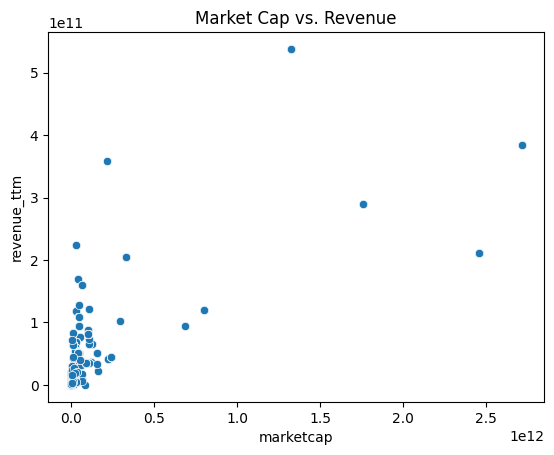

In [25]:
sns.scatterplot(data=df, x='marketcap', y='revenue_ttm')
plt.title('Market Cap vs. Revenue')
plt.show()

## Analyze the distribution of the market capitalization of the companies

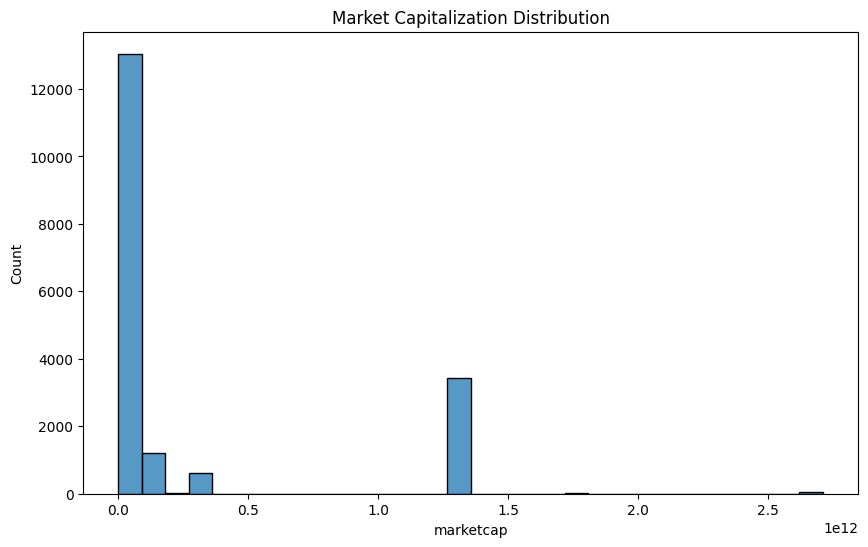

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='marketcap', bins=30)
plt.title('Market Capitalization Distribution')
plt.show()

## Top 10 brands by revenue

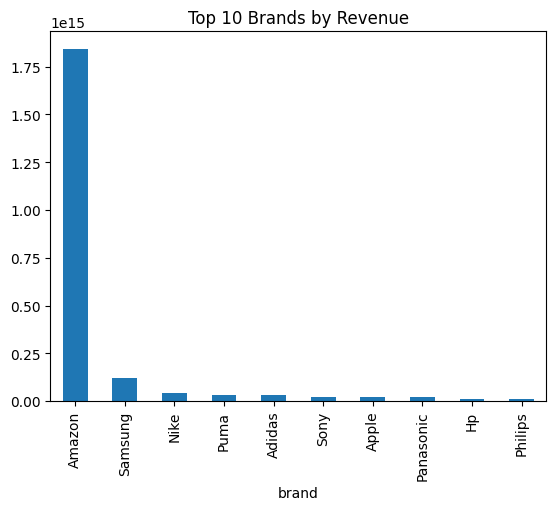

In [22]:
top_brands = df.groupby('brand')['revenue_ttm'].sum().sort_values(ascending=False).head(10)
top_brands.plot(kind='bar')
plt.title('Top 10 Brands by Revenue')
plt.show()

## Analyze the relationship between actual price and discounted price

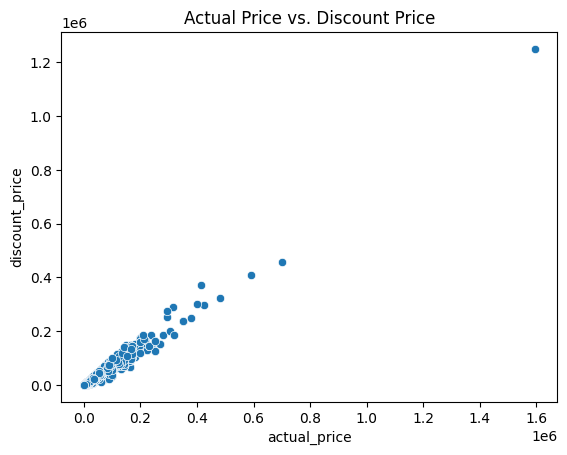

In [24]:
sns.scatterplot(data=df, x='actual_price', y='discount_price')
plt.title('Actual Price vs. Discount Price')
plt.show()

## Analyze the distribution of discount values

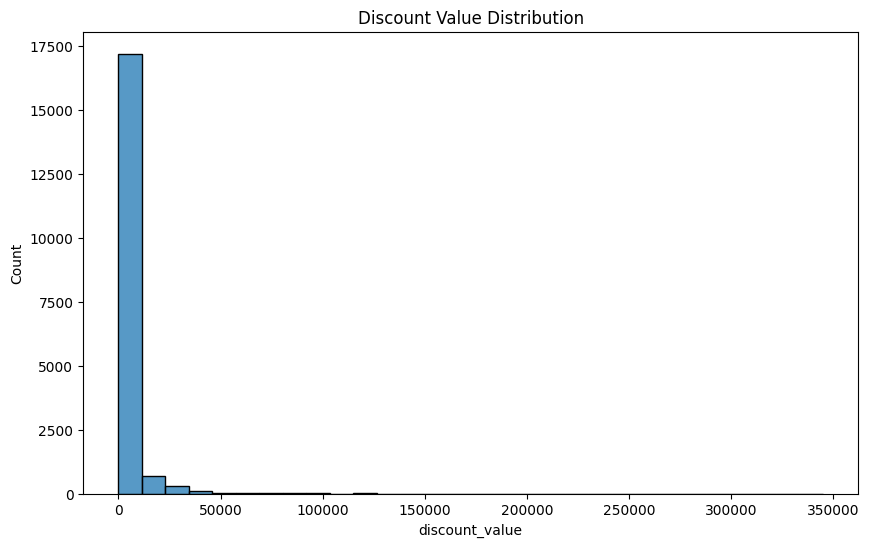

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='discount_value', bins=30)
plt.title('Discount Value Distribution')
plt.show()

## Analyze the average discount percent per brand (top 10 brands)

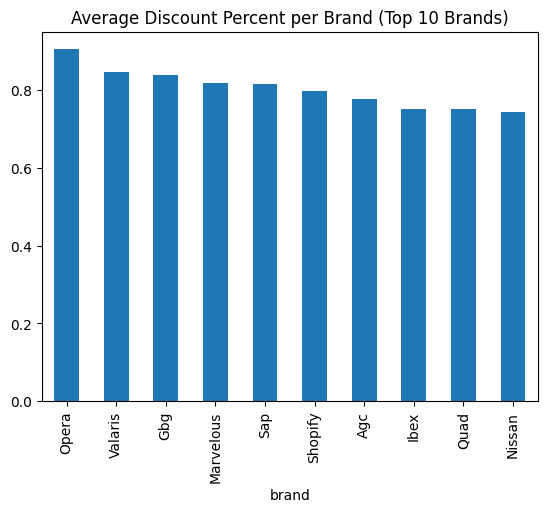

In [26]:
df.groupby('brand')['discounting_percent'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Average Discount Percent per Brand (Top 10 Brands)')
plt.show()

## Analyze the distribution of discount percent

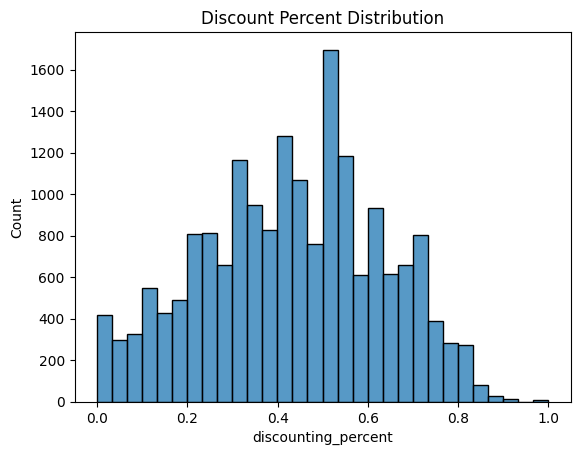

In [27]:
sns.histplot(data=df, x='discounting_percent', bins=30)
plt.title('Discount Percent Distribution')
plt.show()